In [1]:
import numpy as np
from sklearn.base import BaseEstimator, ClusterMixin
from heapq import heappush, heappop, heapify
import pandas as pd
import sklearn.datasets as ds
from pandas import read_csv
import matplotlib.pyplot as plt

%matplotlib inline

In [7]:
class Clustering(BaseEstimator, ClusterMixin):
    def __init__(self, eps, minpts):
        self.eps = eps
        self.minpts = minpts
        self.ordered_list = []
        self.reachability_distance = []

        return

    def fit(self, X, y=None):
        mark = np.zeros(len(X), dtype=int)
        self.reachability_distance = [None for i in range(len(X))]

        def dist2(y, z):
            return ((y - z) ** 2).sum()

        def core_distance(p, N):
            if len(N) >= self.minpts:
                return dist2(X[N[self.minpts - 1]], p)
            return None

        def getNeigbours(p):
            distances = [[dist2(p, v)] for v in X]
            distances = np.hstack((distances, [[i] for i in range(len(X))]))
            distances = distances[np.argsort(distances[:, 0])]
            distances = distances[1:np.searchsorted(distances[:, 0], self.eps ** 2, side='right') + 1]

            return distances[:, 1]

        def change_priority(queue, i, new_priority):
            #tmp = []
            #el = heappop(queue)

            #while len(queue) != 0 and el[1] != i:
            #    heappush(tmp, el)
            #    el = heappop(queue)
            #if el[1] == i:
            #    el[0] = new_priority
            #heappush(queue, el)
            
            #print 'number of poped: ' + str(len(tmp))
            
            #while len(tmp) != 0:
            #    heappush(queue, heappop(tmp))

            heappush(queue, [new_priority, i])
        def update(N, p, seeds):
            coredist = core_distance(p, N)

            for i in N:
                i = int(i)
                if mark[i]:
                    continue
                new_reach_dist = max(coredist, dist2(p, X[i]))

                if self.reachability_distance[i] == None:
                    self.reachability_distance[i] = new_reach_dist
                    heappush(seeds, [new_reach_dist, i])
                elif new_reach_dist < self.reachability_distance[i]:
                    #print 'changing priority'
                    
                    self.reachability_distance[i] = new_reach_dist
                    change_priority(seeds, i, new_reach_dist)

        for i in range(len(X)):
            if mark[i]:
                continue
            
            #print (mark == 1).sum()
            
            #print 'get neigbours'
            
            N = getNeigbours(X[i])
            mark[i] = 1
            self.ordered_list.append(i)

            if core_distance(X[i], N) != None:
                self.reachability_distance[i] = core_distance(X[i], N)
                
                seeds = []
                
                #print 'update 1'
                
                update(N, X[i], seeds)

                #print 'while'
                
                while len(seeds) != 0:
                    
                    #print len(seeds)
                    
                    el = heappop(seeds)
                    
                    if mark[el[1]] == 1:
                        continue
                    
                    N_el = getNeigbours(X[el[1]])
                    mark[el[1]] = 1
                    self.ordered_list.append(el[1])

                    if core_distance(X[el[1]], N_el) != None:
                        
                        #print 'update 2'
                        
                        update(N_el, X[el[1]], seeds)
        return self

    def predict(self, x):
        """
        Using computed model parameters predict cluster
        for all objects from x
        """
        #return [random.randint(0, 5) for r in xrange(self.x_len)]

    def fit_predict(self, x, y=None):
        self.fit(x, y)
        return self.predict(x)

In [3]:
from sklearn.datasets import make_blobs

In [4]:
X, y = make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=1, 
           center_box=(-10.0, 10.0), shuffle=False, random_state=1234)

In [5]:
y = np.array(y)

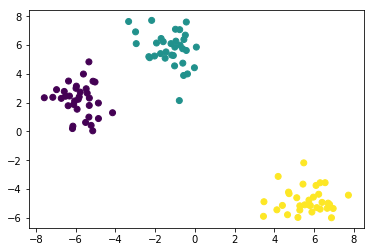

In [6]:
plt.scatter(X[:,0], X[:, 1], c=y)

In [123]:
c = Clustering(eps=1, minpts=3)
c.fit(X)

/Library/Python/2.7/site-packages/ipykernel/__main__.py:19: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


Clustering(eps=1, minpts=3)

<Container object of 100 artists>

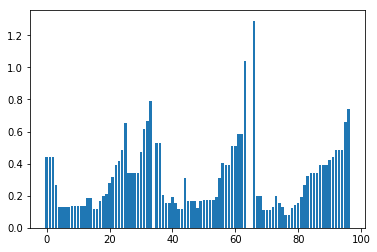

In [185]:
index = np.array(c.ordered_list, dtype=int)
values = np.array(c.reachability_distance, dtype=float)[c.ordered_list]

plt.bar([i for i in range(0, 100)], values[0:100])


In [177]:
y = np.array([-1 for i in range(100)])

In [178]:
y[index[np.array(map(lambda x: (not x), np.isnan(values)), dtype=bool)][0:34]] = 0

In [179]:
y[index[np.array(map(lambda x: (not x), np.isnan(values)), dtype=bool)][34:66]] = 1

In [180]:
y[index[np.array(map(lambda x: (not x), np.isnan(values)), dtype=bool)][66:100]] = 2

In [183]:
y[index[np.isnan(values)]] = 5

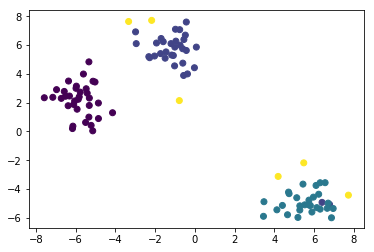

In [184]:
plt.scatter(X[:,0], X[:,1], c=y)

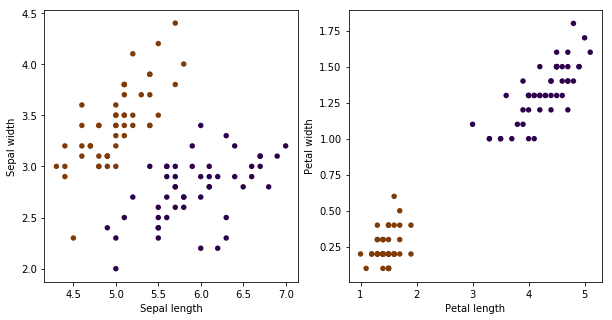

In [106]:
iris = ds.load_iris()
x_iris = iris.data[:100]
y_iris = iris.target[:100]

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(x_iris[:, 0], x_iris[:, 1], c=y_iris, cmap=plt.cm.PuOr, lw=0, s=30)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.subplot(1, 2, 2)
plt.scatter(x_iris[:, 2], x_iris[:, 3], c=y_iris, cmap=plt.cm.PuOr, lw=0, s=30)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.show()

In [107]:
iris_cl = Clustering(eps=0.7, minpts=5)
iris_cl.fit(iris.data)

/Library/Python/2.7/site-packages/ipykernel/__main__.py:19: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


Clustering(eps=0.7, minpts=5)

<Container object of 150 artists>

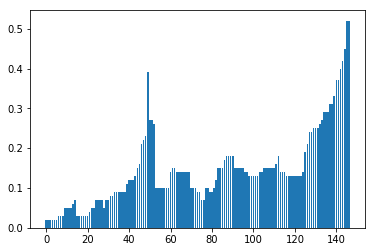

In [108]:
index = np.array(iris_cl.ordered_list, dtype=int)
values = np.array(iris_cl.reachability_distance, dtype=float)[iris_cl.ordered_list]

plt.bar([i for i in range(0, 150)], values[0:150])

In [91]:
clusters = np.array([-1 for i in range(150)])

In [92]:
clusters[index[0:49]] = 0

In [118]:
clusters[index[49:143]] = 1

In [119]:
clusters[index[143:150]] = 2

In [120]:
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [106]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [107]:
from sklearn.metrics import adjusted_rand_score

In [121]:
adjusted_rand_score(iris.target, clusters)

0.52677251807785408

In [2]:
import mpl_toolkits.basemap as bm

In [14]:
data = read_csv('vk_places_5000.csv', sep=';')

In [15]:
x = np.array(data[['latitude', 'longitude']].sample(1000).values)
y = [0 for i in range(len(x))]

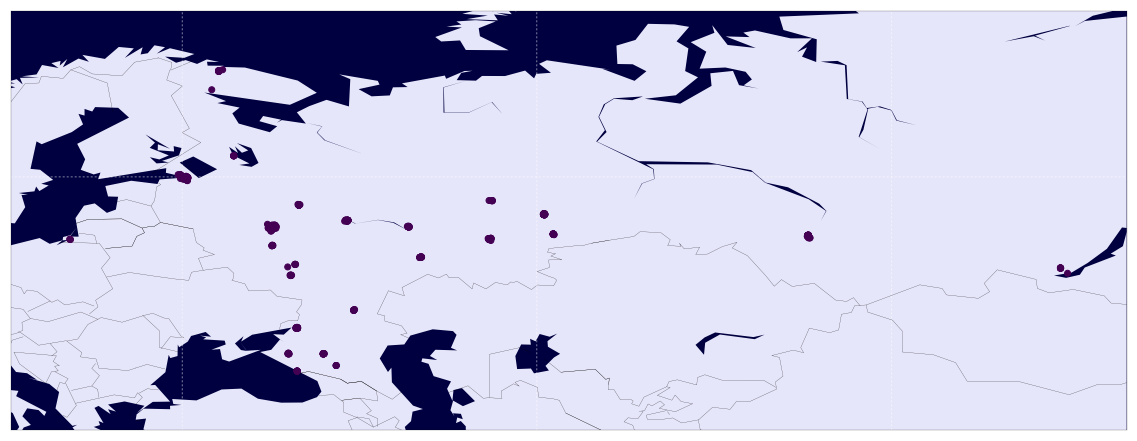

In [16]:
plt.figure(figsize=(20,12))

m = bm.Basemap(projection='cyl', llcrnrlat=min(x[:, 0]) - 5, urcrnrlat=max(x[:, 0]) + 5, llcrnrlon=min(x[:, 1]) - 5, urcrnrlon=max(x[:, 1]) + 5, resolution='c')

m.drawcountries(linewidth=0.2)
m.fillcontinents(color='lavender', lake_color='#000040')
m.drawmapboundary(linewidth=0.2, fill_color='#000040')
m.drawparallels(np.arange(-90,90,30),labels=[0,0,0,0], color='white', linewidth=0.5)
m.drawmeridians(np.arange(0,360,30),labels=[0,0,0,0], color='white', linewidth=0.5)

m.scatter(x[:, 1], x[:,0], c=y, zorder=10)
    
plt.show()

In [40]:
cvk = Clustering(0.4, 30)

In [41]:
cvk.fit(x)

/Library/Python/2.7/site-packages/ipykernel/__main__.py:19: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


Clustering(eps=0.4, minpts=50)

<Container object of 318 artists>

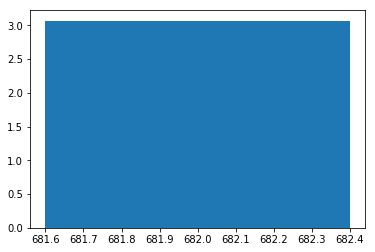

In [175]:
index = np.array(cvk.ordered_list, dtype=int)
values = np.array(cvk.reachability_distance, dtype=float)[cvk.ordered_list]

plt.bar([i for i in range(682, 1000)], values[682:1000])

In [177]:
values[682:1000]

array([ 3.06673431,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,      

In [176]:
len(index[np.isnan(values)])

338

In [21]:
import folium
from folium.plugins import MarkerCluster

In [22]:
mos_center = [55.752195, 37.620771]
mos_min_lat, mos_max_lat = 55.564141, 55.908930
mos_min_lon, mos_max_lon = 37.344362, 37.879945

In [168]:
moscow = folium.Map(location=mos_center, zoom_start=10)

In [106]:
#msk
points = x[index[np.array(map(lambda x: (not x), np.isnan(values)), dtype=bool)]][0:343]

In [128]:
#питер
points = x[index[np.array(map(lambda x: (not x), np.isnan(values)), dtype=bool)]][343:589]

In [157]:
#ekb
points = x[index[np.array(map(lambda x: (not x), np.isnan(values)), dtype=bool)]][589:682]

In [178]:
#nans
points = x[index[np.isnan(values)]]

In [179]:
marker_cluster = MarkerCluster(points)

In [180]:
marker_cluster.add_to(moscow)

In [181]:
moscow